In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from pandas.api.types import is_string_dtype, is_numeric_dtype,is_object_dtype
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import gridspec
from matplotlib.pyplot import *
import seaborn as sns

In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score,auc,make_scorer,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
import pyLDAvis
import pyLDAvis.gensim

from itertools import chain
from collections import Counter
import scipy as sp

import scipy.stats as ss
import random

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\chaitanya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\chaitanya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
import spacy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.models import Word2Vec
from scipy.spatial.distance import cdist

In [11]:
import os
dataset = pd.read_csv("Hotel_Reviews.csv")
print(dataset.shape)

(515738, 17)


In [13]:
dataset.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [15]:
duplicated = dataset.duplicated().sum()
print(f'El dataset tiene {duplicated} filas duplicadas.')

El dataset tiene 526 filas duplicadas.


In [17]:
df = dataset.drop_duplicates()
df.shape

(515212, 17)

In [19]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 515212 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        515212 non-null  object 
 6   Negative_Review                             515212 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515212 non-null  object 
 10  R

In [21]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,511944.000000,511944.000000
mean,498.416021,8.397767,18.540822,2744.698889,17.778256,7.164895,8.395532,49.443040,2.824222
std,500.668595,0.547952,29.693991,2318.090821,21.804541,11.039354,1.637467,3.468029,4.581637
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214277,-0.143649
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [23]:
df.isna().sum().sort_values(ascending=False)

lng                                           3268
lat                                           3268
Positive_Review                                  0
days_since_review                                0
Tags                                             0
Reviewer_Score                                   0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Review_Total_Positive_Word_Counts                0
Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Total_Negative_Word_Counts                0
Negative_Review                                  0
Reviewer_Nationality                             0
Hotel_Name                                       0
Average_Score                                    0
Review_Date                                      0
Total_Number_of_Reviews                          0
dtype: int64

In [25]:
for column in df:
    if is_object_dtype(df[column]):
        print(column,len(df[column].unique()))

Hotel_Address 1493
Review_Date 731
Hotel_Name 1492
Reviewer_Nationality 227
Negative_Review 330011
Positive_Review 412601
Tags 55242
days_since_review 731


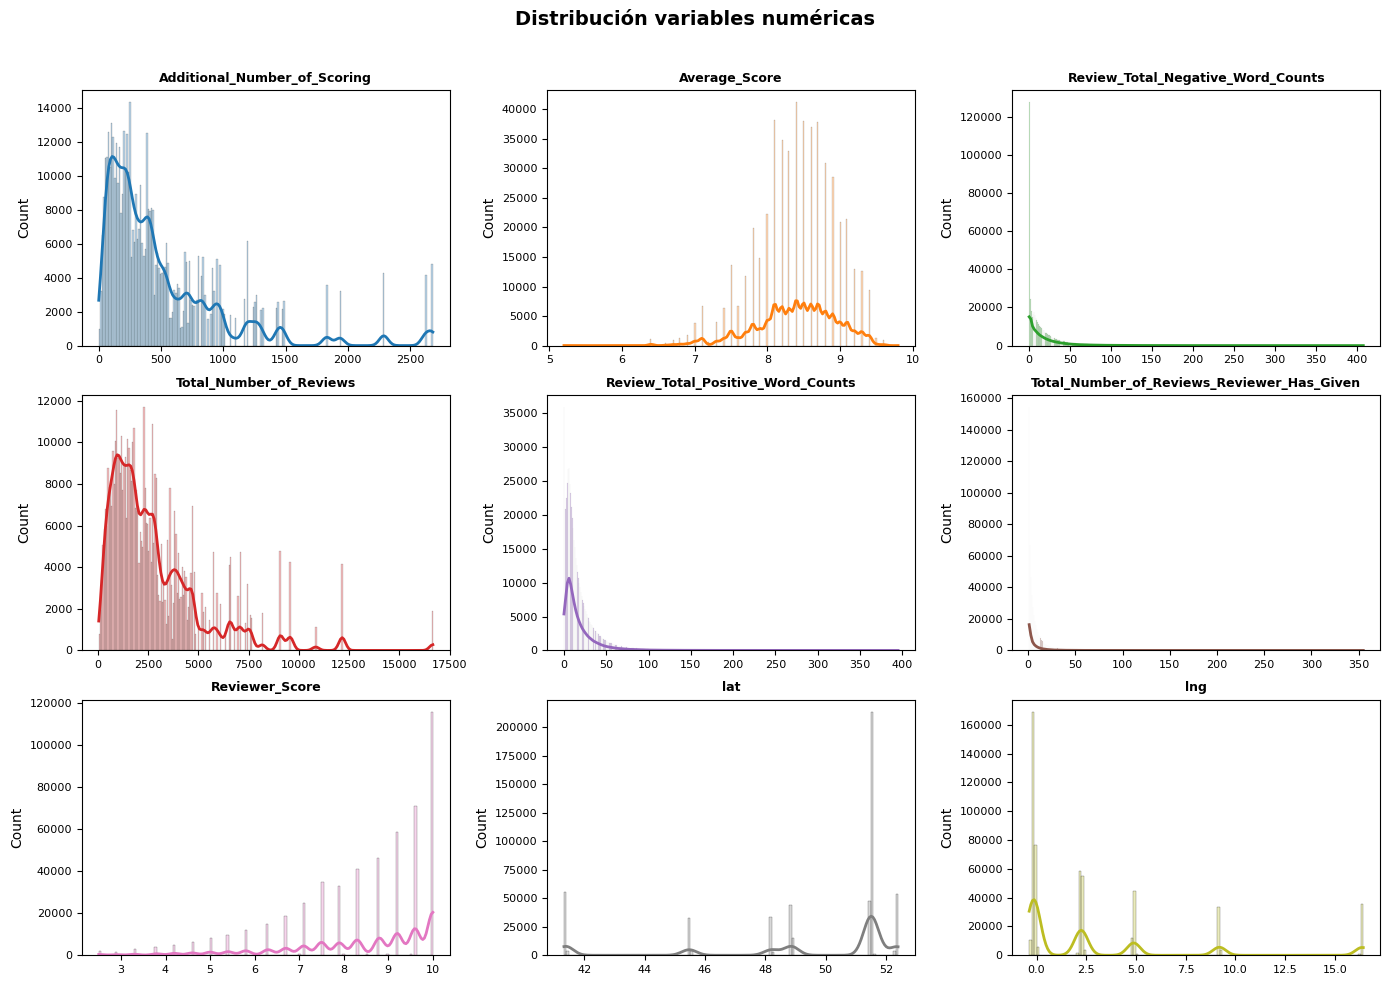

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 14, fontweight = "bold");

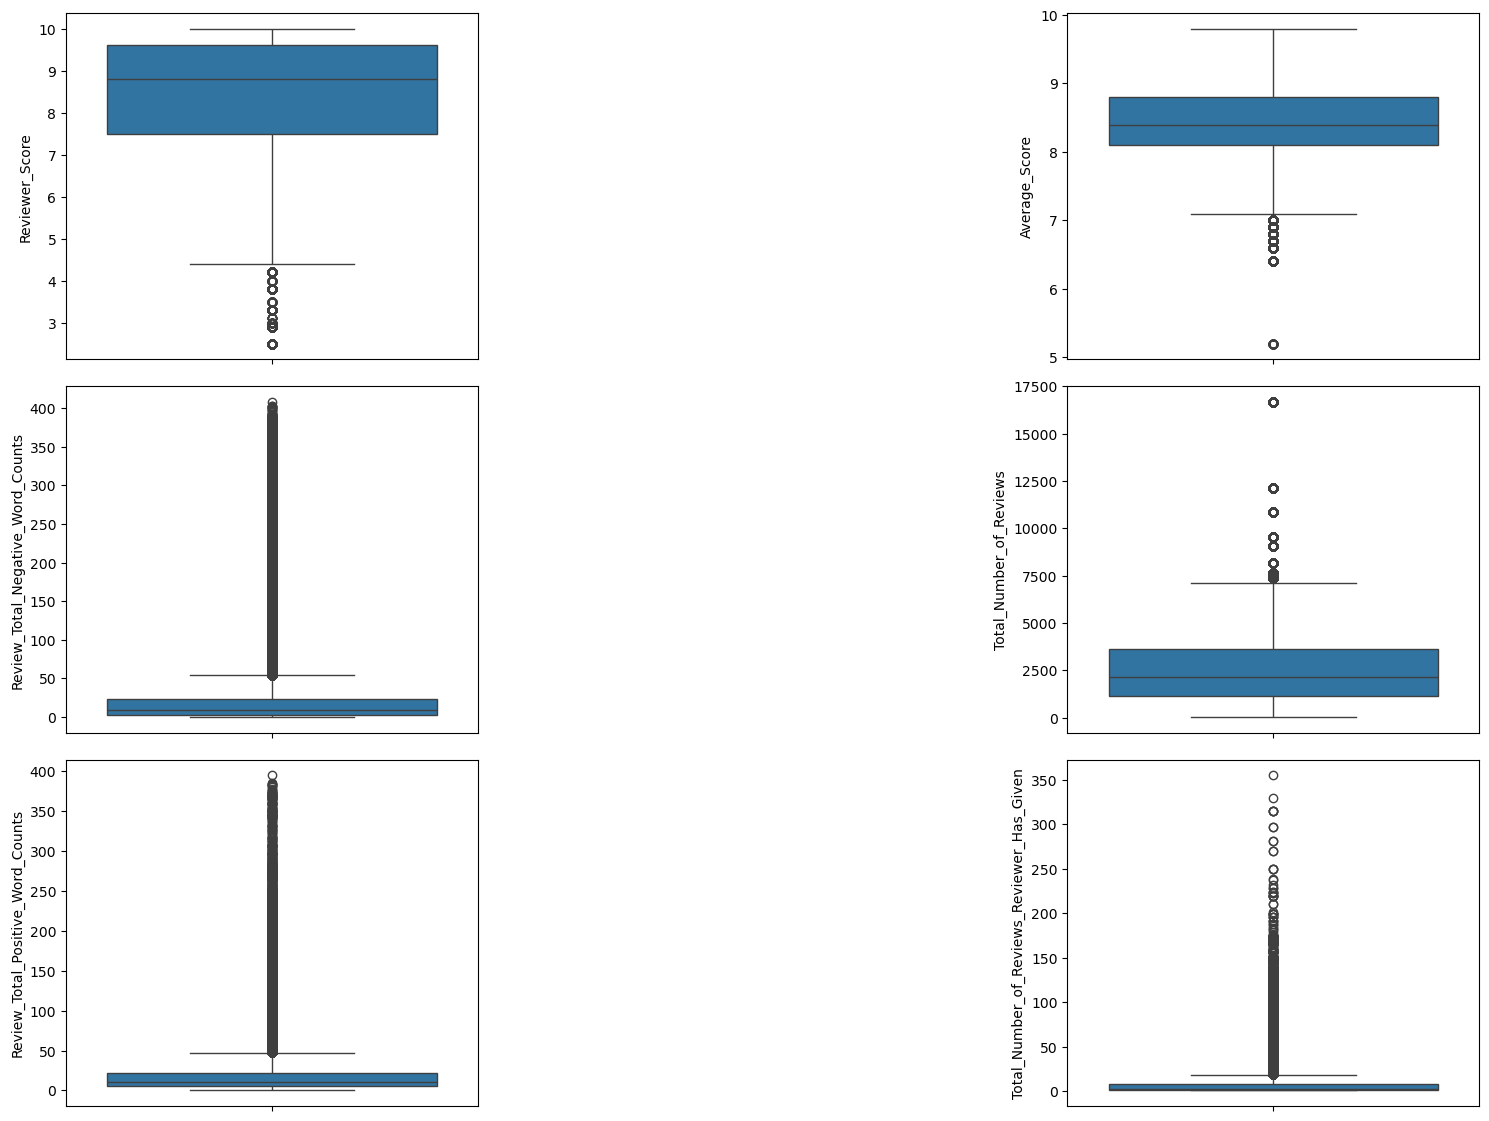

In [35]:
columnas = ['Reviewer_Score', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 
           'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given']
n = 1
plt.figure(figsize=(20,15))

for column in columnas:
  plt.subplot(4,4,n)
  n = n+2
  sns.boxplot(df[column])
  plt.tight_layout()

Pre processing

In [51]:

df['month'] = pd.to_datetime(df['Review_Date']).dt.month.apply(str)
df['year'] = pd.to_datetime(df['Review_Date']).dt.year.apply(str)
df['day'] = pd.to_datetime(df['Review_Date']).dt.day.apply(str)
df['month_name'] = pd.to_datetime(df['Review_Date']).dt.month_name() # no se compila con  locale="English"

df['period'] = pd.to_datetime(df['Review_Date']).dt.strftime('%m/%Y')
df['period'] = pd.to_datetime(df['period'])
df[['month','year','day','month_name','period']].dtypes
#df[['month','year','day','month_name','period']]


month                 object
year                  object
day                   object
month_name            object
period        datetime64[ns]
dtype: object

In [47]:
df[['month','year','day','month_name','period']]

,month,year,day,month_name,period
0,8,2017,3,August,08/2017
1,8,2017,3,August,08/2017
2,7,2017,31,July,07/2017
3,7,2017,31,July,07/2017
4,7,2017,24,July,07/2017
...,...,...,...,...,...
515733,8,2015,30,August,08/2015
515734,8,2015,22,August,08/2015
515735,8,2015,19,August,08/2015
515736,8,2015,17,August,08/2015


In [65]:
df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Negative_Word_Counts                          False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Positive_Word_Counts                          False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                            True
lng                                            True
month       

In [61]:
random = np.random.choice(df['Reviewer_Nationality'])
df['Reviewer_Nationality'] = df['Reviewer_Nationality'].fillna(random)

df['Negative_Review'] = df['Negative_Review'].fillna('No Negative')
df['Positive_Review'] = df['Positive_Review'].fillna('No Positive')

df[['Reviewer_Nationality','Negative_Review','Positive_Review']].isnull().any().any()

False

In [63]:
df.insert(7,'Negative_Word_Counts',df['Negative_Review'].str.split().str.len())
df.insert(11,'Positive_Word_Counts',df['Positive_Review'].str.split().str.len())

df.loc[df.Positive_Review == 'No Positive', ['Positive_Word_Counts']] = 0
df.loc[df.Negative_Review == 'No Negative', ['Negative_Word_Counts']] = 0

df.Reviewer_Nationality = df.Reviewer_Nationality.str.rstrip()

def country_ident(st):
    last = st.split()[-1]
    if last == "Kingdom": return "United Kingdom"
    else: 
        return last
    
df["Hotel_Country"] = df["Hotel_Address"].apply(country_ident)

In [67]:
df.drop(['Review_Date','Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts', 'Additional_Number_of_Scoring'],axis=1, inplace=True)

In [69]:
df.head()

,Hotel_Address,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,month,year,day,month_name,period,Hotel_Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,395,1403,Only the park outside of the hotel was beauti...,9,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,8,2017,3,August,2017-08-01,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,103,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,8,2017,3,August,2017-08-01,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,40,1403,Location was good and staff were ok It is cut...,19,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,7,2017,31,July,2017-07-01,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,208,1403,Great location in nice surroundings the bar a...,24,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,7,2017,31,July,2017-07-01,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,138,1403,Amazing location and building Romantic setting,6,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,7,2017,24,July,2017-07-01,Netherlands


In [71]:
labelencoder = LabelEncoder()
df2 = df
# Assigning numerical values and storing in another column
df2['Reviewer_Nationality_cat'] = labelencoder.fit_transform(df2['Reviewer_Nationality'])
print("Correlacion entre Nacionalidad y puntuacion:",df2.Reviewer_Nationality_cat.corr(df2.Reviewer_Score))

Correlacion entre Nacionalidad y puntuacion: 0.03480159002068762
